In [1]:
###IMPORTS & DOWNLOADS

import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import sqlite3
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\crazy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\crazy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\crazy\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\crazy\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\crazy\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
#DATASET CONTENT LOADING

con = sqlite3.connect('SQL.db')
cur = con.cursor()
all_data = []
for r in cur.execute("SELECT website_id, website_content FROM websites"):
    website_id = r[0]
    website_content = r[1]
    all_data.append(r[1])

In [3]:
#POS TAGGING

pos_tagged = []

for doc in all_data:
    doc = re.sub(r'[^A-Za-z0-9 ]+', '', doc)
    wt = nltk.word_tokenize(doc)
    pos_tagged.append(nltk.pos_tag(wt, tagset = "universal"))

In [4]:
flat_list = [item for sublist in pos_tagged for item in sublist]


In [5]:
#PATTERN DEFINITION & PARSING
pattern = 'NamedEntity: {<DET>?<NOUN|JJ><DET>*<NOUN>}'
cp = nltk.RegexpParser(pattern)
cs = cp.parse(flat_list)
NamedEntities = []
for p in cs:
    try:
        if p.label() == "NamedEntity":
            NamedEntities.append(' '.join([i[0] for i in p.leaves()]))
    except AttributeError:
        continue


In [19]:
#SORTING NAMED ENTITIES
import numpy as np
values, counts = np.unique(NamedEntities, return_counts=True)
SortedCounts = sorted(counts)[::-1]
SortedCountsIndexes =np.argsort(counts)[::-1]
SortedEntities = []
for i in SortedCountsIndexes:
    SortedEntities.append(values[i])


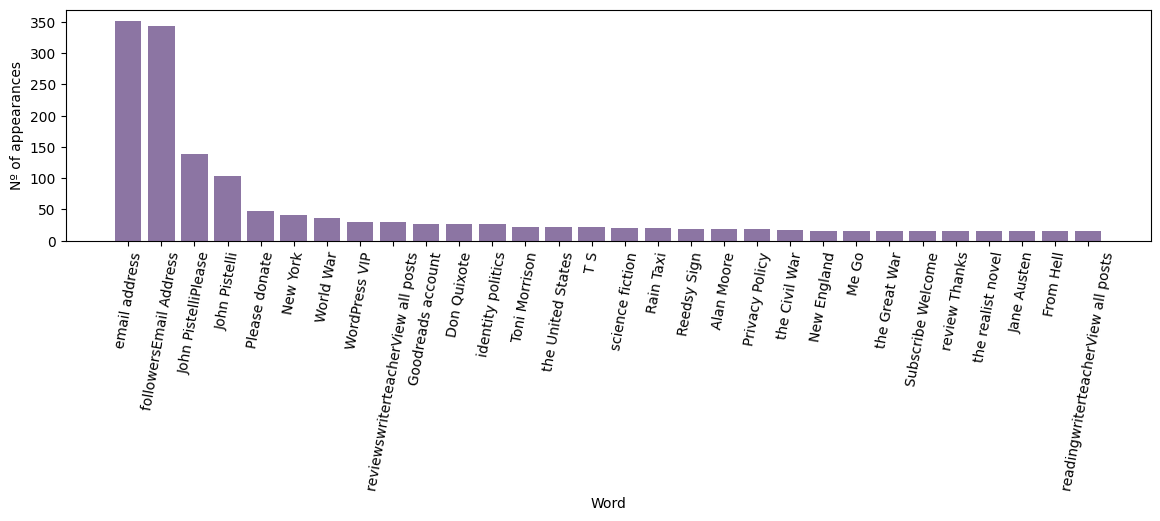

In [21]:
#PLOTING MOST FREQUENT NAMED ENTITIES
import matplotlib.pyplot as plt
plt.style.use('default')
n_palavras = 30
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], SortedCounts[0:n_palavras], color=(0.5, 0.4, 0.6, 0.9))
plt.xticks(eixo_x[0:n_palavras], SortedEntities[0:n_palavras], rotation=80)
plt.ylabel('Nº of appearances')
plt.xlabel('Named Entity')
plt.show()